<a href="https://colab.research.google.com/github/van-dang/FEniCS-Colab/blob/master/Time_stepping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solve an ODE

After this lecture, students are able to

*   Familiarize with the most commonly used numerical schemes to solve an ODE.
*  Understand why one needs different schemes.
*  Bring the method to practice.



We consider a first-order ODE 
$$\frac{du}{dt}=f(u,t), \quad t\in (0, T]\\\text{with initial condition } u(0)=u_0 $$

Can we find the analytical solution easily?

For example

$$\frac{du}{dt}=-10\, u$$ 
with $u(0)=1$ can be easily solve to obtain $u(t)=\exp(-10\,t)$.

How about $\dfrac{du}{dt}=-10\, u +\,t$ with u(t)=1? Not easy to solve with a very small change!

One needs to rely on numerical solution.

**Procedure**

*   Discretize the domain $(0, T]$ by $N$ grid points $0=t_0<t_1<...<t_{N-1}=T$ with $k=t_{n}-t_{n-1}$. 

*  Use the approximation $\dfrac{du}{dt}\approx \dfrac{u_n-u_{n-1}}{k}$ for the left-hand side of the equation.
*   How to approximate the right-hand side? There are several options

    *  $f(u,t)\approx f(u_{n-1},t_{n-1})$: Forward (explicit) Euler method
      $$\dfrac{u_n-u_{n-1}}{k}=f(u_{n-1},t_{n-1}) \implies u_n=kf(u_{n-1},t_{n-1})+u_{n-1}$$
      
    * $f(u,t)\approx f(u_{n},t_{n})$: Backward (implicit) Euler method
      $$\dfrac{u_n-u_{n-1}}{k}=f(u_{n},t_{n}) \implies u_n-kf(u_{n},t_{n})=u_{n-1}$$

    * $f(u,t)\approx \dfrac{1}{2} \Bigl( f(u_{n},t_{n}) +  f(u_{n-1},t_{n-1}) \Bigl)$: Crank Nilcolson (midpoint) method
      $$\dfrac{u_n-u_{n-1}}{k}=\dfrac{1}{2} \Bigl( f(u_{n},t_{n}) +  f(u_{n-1},t_{n-1}) \Bigl) \implies u_n-\dfrac{k}{2}f(u_{n},t_{n})=u_{n-1} + \dfrac{k}{2}f(u_{n-1},t_{n-1})$$
    * $f(u,t)\approx \theta f(u_{n},t_{n}) +  (1-\theta)f(u_{n-1},t_{n-1})$ with $\theta\in[0, 1]$: $\theta-method$
      $$\dfrac{u_n-u_{n-1}}{k}=\theta f(u_{n},t_{n}) +  (1-\theta)f(u_{n-1},t_{n-1}) \implies u_n-k \theta(u_{n},t_{n})=u_{n-1} + k(1-\theta)f(u_{n-1},t_{n-1})$$ 
      
**Quick test** verify that $\theta-$method is the general form of  the Euler and midpoint methods.





**Why are there different schemes?**

The following code illustrates the $\theta-$method for the first-order ODE 
$$\frac{du}{dt}=-10\,u$$
The numerical solution is compared to the exact solution $u=\exp(-10\,t)$.

**Exercise** 

1.   Compare three methods Forward Euler ($\theta=0$), Backward Euler ($\theta=1$) and mipoint ($\theta=0.5$) in terms of accuracy and stability for $N=10, 50, 100$
2.   Modify the code to solve $\dfrac{du}{dt}=-10\,u+ t, \text{ with } u(0)=1$



max error: 0.19509523742197837


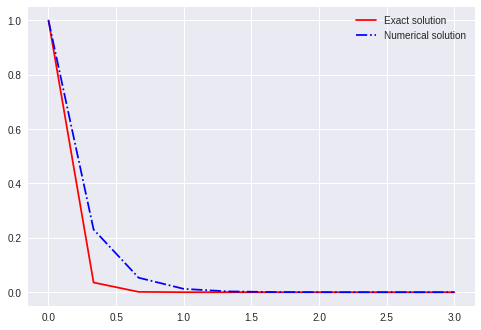

In [0]:
import numpy as np
import matplotlib.pyplot as plt

a, b, N  = 0, 3, 10;
u = [0]*N;
t = np.linspace(a, b, num=N)
k = t[1] - t[0];
theta = 1.0;

u[0] = 1;
for i in range(1,N):
  u[i] = (u[i-1]+k*(1-theta)*(-10*u[i-1]))/(1-k*theta*(-10))

max_error = max(abs(np.exp(-10*t)-u))  

print("max error:", max_error)

plt.plot(t,np.exp(-10*t),'r-',t,u,'b-.')
plt.gca().legend(('Exact solution','Numerical solution'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  del sys.path[0]


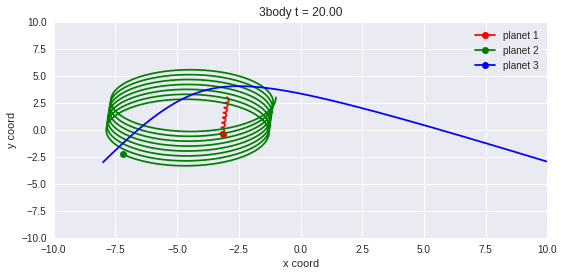

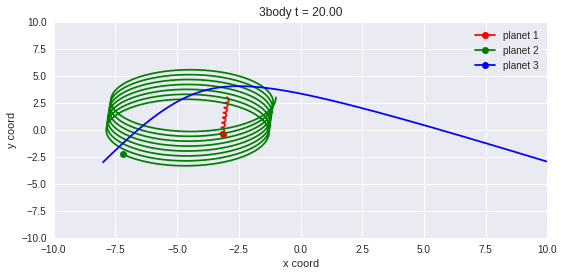

In [0]:
import matplotlib.pyplot as plt

from pylab import *; M = 3  # M number of particles

def step(f, t0, u0, k, method): # One step for ODE: u' = f(t, u), u(0) = u0, returns u(t + k)
    thetadict = {"Forward Euler": 0., "Backward Euler": 1., "Trapezoid": 0.5}; theta = thetadict[method]
    M = 5; t = t0 + k; u = u0 # Starting guess
    for i in range(0, M): # M fixed-point iterations
        u = u0 + (1. - theta)*k*f(t0, u0) + theta*k*f(t, u)
    return u

def solve(f, I, u0, k, method): # Solve ODE u' = f(t, u), u(0) = u0, I = [t0, T], returns array of t and u
    tarr = linspace(I[0], I[1], (I[1] - I[0])/k + 1); uarr = zeros([size(u0), tarr.size]); uarr[:, 0] = u0
    t = I[0]; T = I[1]; u = u0; i = 1
    for t in tarr[1:]: u0 = u; u = step(f, t - k, u0, k, method); uarr[:, i] = u; i += 1
    return [tarr, uarr]

def f_3body(t, u):
    fval[:] = 0.; m = [200, 4, 1]; K = 0.*100.0; L = 0.*2.0 # Mass m, stiffness E, rest length L
    for i0 in range(0, M):
        for i1 in range(0, M):
            if(i0 != i1):
                r = norm(u[i1:2*M:M] - u[i0:2*M:M]); e = (u[i1:2*M:M] - u[i0:2*M:M])/r; # radius and direction
                fval[i0 + 2*M::M] += (K*(r - L)*e + m[i1]*m[i0]*e/r**2) / m[i0] # Elastic and gravity forces
    fval[:2*M] = u[2*M:]; return fval

def plot_simple_anim(tarr, uarr, I, pl, ax, fig, j):
    ax.cla(); u = uarr[:, j]; t = tarr[j]; T = I[1]; N = 2*M
    ax.plot(u[0:N:3][0], u[0:N:3][1], 'r-o', u[1:N:3][0], u[1:N:3][1], 'g-o', u[2:N:3][0], u[2:N:3][1], 'b-o');
    ax.plot(uarr[0*M+0, :j], uarr[1*M+0, :j], 'r-');  ax.plot(uarr[0*M+1, :j], uarr[1*M+1, :j], 'g-');
    ax.plot(uarr[0*M+2, :j], uarr[1*M+2, :j], 'b-');
    ax.set_xlim([-10., 10.]); ax.set_ylim([-10., 10.]); ax.set_xlabel("x coord"); ax.set_ylabel("y coord");
    ax.legend(["planet 1", "planet 2", "planet 3"]); ax.set_title("3body t = %2.2f" % t); pl.canvas.draw()
    plt.tight_layout(); dpl = display(pl, display_id="test");

    return (pl, ax)

u0 = zeros(4*M); x = zeros([M, 2]); v = zeros([M, 2]); a = zeros((M, 2)); fval = zeros(4*M) # Initial arrays
x = stack([[-3., 3.], [-1., 3.], [-8., -3.]]); v = stack([[0., 0.], [0., -12.], [4., 9.]]) # Initial values
u0[:] = concatenate([x.flatten("F"), v.flatten("F")]);  # Pack values

I = [0., 20.]; k = 0.01; [tarr, uarr] = solve(f_3body, I, u0, k, "Trapezoid")

pl, ax = plt.subplots(); fig = plt.gcf(); fig.set_size_inches(8, 4)
# pl, ax = plt.subplots(); display(pl); clear_output(); # Plotting setup

#for j in range(0, 10, 1):
  #pl, ax = plot_simple_anim(tarr, uarr, I, pl, ax, fig, j);

for j in range(0, size(tarr), 5): pl, ax = plot_simple_anim(tarr, uarr, I, pl, ax, fig, j);